In [1]:
%%time
dataset_name = "W20_only"
df_list = "BES_Panel"

%matplotlib inline
%run BES_header.py {dataset_name} {df_list}

Toggle code

Wall time: 11.6 s


In [2]:
import requests
from bs4 import BeautifulSoup
from lxml import html
from lxml import etree

from textdistance import levenshtein

In [82]:
df_filled_in = pd.read_pickle("C:\\Users\\Gamer\\Downloads\\df_filled_in.pkl",compression='zip')

In [4]:
df_filled_in.corr()["Winner19_lgbt_out"].dropna().sort_values()

Winner19_age                     -0.188970
Elected at_19                    -0.164666
Holy Book(King James Bible)_19   -0.132640
Winner17_age                     -0.081709
Winner17_bme                     -0.077613
Winner19_milvet                  -0.070434
Winner15_bme                     -0.064042
Winner17_milvet                  -0.062710
Winner19_bme                     -0.057142
Winner15_cann                    -0.054801
Winner17_cann                    -0.053214
Winner15_age                     -0.046784
Winner17_children                -0.046719
Winner19_cann                    -0.044534
Reinstated 17                    -0.041351
LostWhip 17                      -0.039564
Winner15_milvet                  -0.039564
Num Transitions In Term 17       -0.036005
Holy Book(Old Testament)_19      -0.033881
resigned_15                      -0.033881
Holy Book(Jerusalem Bible)_19    -0.032832
LostWhip 15                      -0.028590
Num Transitions In Term 15       -0.027112
Holy Book(B

In [5]:
df_filled_in.corr()["Winner19_age"].dropna().sort_values()

Winner19_lgbt_out                -0.188970
ChangeParty 17                   -0.138170
Winner19_bme                     -0.135953
Num Transitions In Term 17       -0.116127
EndIndep 17                      -0.100182
Winner17_lgbt_out                -0.092761
LostWhip 17                      -0.092708
Holy Book(New Testament)_19      -0.080755
Holy Book(Quran)_19              -0.078713
resigned_17                      -0.075606
Reinstated 17                    -0.066093
Winner17_bme                     -0.063865
Holy Book(Hebrew Bible)_19       -0.050518
resigned_15                      -0.048600
Winner15_lgbt_out                -0.040511
Holy Book(Dhammapada)_19         -0.038604
Winner15_cann                    -0.031772
Holy Book(Torah)_19              -0.031492
Winner15_bme                     -0.029452
Winner17_cann                    -0.027552
pano                             -0.021324
Reinstated 15                    -0.013711
Affirmation_instead_of_oath_19   -0.013554
Holy Book(W

In [6]:
df_filled_in.corr()["Winner19_bme"].dropna().sort_values()

Holy Book(King James Bible)_19   -0.174933
Winner17_children                -0.141546
Winner15_children                -0.139179
Winner19_age                     -0.135953
Winner19_children                -0.129162
Winner15_lgbt_out                -0.088356
Winner17_lgbt_out                -0.077930
Elected at_19                    -0.059890
Holy Book(Jerusalem Bible)_19    -0.059133
Winner19_lgbt_out                -0.057142
Holy Book(Welsh Bible)_19        -0.048025
Winner17_milvet                  -0.045322
Winner15_milvet                  -0.043695
Holy Book(New Testament)_19      -0.039834
Holy Book(Scottish Bible)_19     -0.039834
Holy Book(Old Testament)_19      -0.035076
Winner19_milvet                  -0.034855
EndIndep 15                      -0.026453
ChangeParty 19                   -0.022891
Holy Book(Hebrew Bible)_19       -0.022891
Reinstated 17                    -0.018930
Holy Book(Book of Mormon)_19     -0.018676
Winner17_age                     -0.017157
Winner19_ca

In [7]:
# Elected at_19                     0.547125
# df_filled_in.corr()["Winner19_age"]

In [101]:
df_filled_in["Seniority19"].dropna()
# BUG!

0      409
1      501
2      351
3      643
4      437
      ... 
645    308
646    563
647    369
648    207
649     69
Name: Seniority19, Length: 650, dtype: int32

In [9]:
df_filled_in.isnull().sum().sort_values(ascending=False).head(50)

Seniority15                       650
Unnamed: 20                       650
Seniority19                       650
FirstParlTerm19                   650
Seniority17                       650
FirstParlTerm17                   650
FirstParlTerm15                   650
Winner17_religion_source.1        650
Unnamed: 24                       650
Unnamed: 23                       650
Unnamed: 21                       650
Unnamed: 22                       650
Unnamed: 19                       649
resigned_17_notes                 646
Winner15_religion_notes           644
resigned_15_notes                 643
resigned_19_notes                 641
Service teminated_19              639
Winner15_religion                 638
Winner15_religion_source          637
Transitions In Term 19 Notes      568
Winner17_religion_notes           534
Winner19_religion_notes           531
Winner19_religion                 495
Winner17_religion                 495
Winner17_religion_source          462
Winner19_rel

In [10]:
df_filled_in[search(df_filled_in,"Unnamed").index].notnull().sum()

Unnamed: 19    1
Unnamed: 20    0
Unnamed: 21    0
Unnamed: 22    0
Unnamed: 23    0
Unnamed: 24    0
dtype: int64

In [83]:
df_filled_in.drop(['Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24','Winner17_religion_source.1'],axis=1,inplace=True,errors='ignore')

In [12]:
df_filled_in[ search(df_filled_in,"Winner17_reli").index ].notnull().sum()

Winner17_religion           155
Winner17_religion_notes     116
Winner17_religion_source    188
dtype: int64

In [13]:
search(df_filled_in,"female")

Winner19_female    650
Winner17_female    650
Winner15_female    650
dtype: int64

In [87]:
df_filled_in["Winner19_female"].value_counts()

False    430
True     220
Name: Winner19_female, dtype: int64

In [15]:
df_filled_in.dtypes.value_counts()

object            57
bool              40
float64           13
datetime64[ns]     4
int64              1
dtype: int64

In [84]:
bool_cols = df_filled_in.select_dtypes('bool').columns
bool_cols
df_filled_in[bool_cols] = df_filled_in[bool_cols].astype(float)

In [17]:
df_filled_in.select_dtypes('object').columns

Index(['ONSConstID', 'ConstituencyName', 'Country', 'Winner19', 'Winner17',
       'Winner15', 'Winner15_name', 'Winner15_religion',
       'Winner15_religion_notes', 'Winner15_religion_source', 'Winner17_name',
       'Winner17_religion', 'Winner17_religion_notes',
       'Winner17_religion_source', 'Winner19_name', 'Winner19_religion',
       'Winner19_religion_notes', 'Winner19_religion_source',
       'Winner19_surname', 'Winner19_firstname', 'Winner17_surname',
       'Winner17_firstname', 'Winner15_surname', 'Winner15_firstname',
       'Winner19_female', 'Winner17_female', 'Winner15_female',
       'Winner15_bes_bme', 'public_whip15_mp_ids', 'public_whip17_mp_ids',
       'public_whip19_mp_ids', 'FirstParlTerm19', 'FirstParlTerm17',
       'FirstParlTerm15', 'Transitions In Term 19', 'Transitions In Term 17',
       'Transitions In Term 15', 'Transitions In Term 19 Notes',
       'resigned_15_notes', 'resigned_17_notes', 'resigned_19_notes',
       'Order of Oath_19', 'Holy book

In [18]:
df_filled_in[["Winner15_religion"]].value_counts().sum()

## sus - did we ever fill this in???
## I have the terror that we did ... and somehow didn't save it?!?

12

In [85]:
df_filled_in[["Winner17_religion"]].value_counts().sum()

155

In [86]:
df_filled_in[["Winner19_religion"]].value_counts().sum()

155

In [88]:
df_filled_in[['Winner19_female', 'Winner17_female', 'Winner15_female','Winner15_bes_bme']] = df_filled_in[['Winner19_female', 'Winner17_female', 'Winner15_female','Winner15_bes_bme']].astype('float')

df_filled_in[['Holy Book(Bhagavad Gita)_17', 'Holy Book(Dhammapada)_17',
       'Holy Book(Hebrew Bible)_17', 'Holy Book(Jerusalem Bible)_17',
       'Holy Book(King James Bible)_17', 'Holy Book(New Testament)_17',
       'Holy Book(Old Testament)_17', 'Holy Book(Quran)_17',
       'Holy Book(Scottish Bible)_17', 'Holy Book(Torah)_17',
       'Holy Book(Welsh Bible)_17', 'Holy Book(Book of Mormon)_17',
       'Holy Book(Affirmation)_17']] = df_filled_in[['Holy Book(Bhagavad Gita)_17', 'Holy Book(Dhammapada)_17',
       'Holy Book(Hebrew Bible)_17', 'Holy Book(Jerusalem Bible)_17',
       'Holy Book(King James Bible)_17', 'Holy Book(New Testament)_17',
       'Holy Book(Old Testament)_17', 'Holy Book(Quran)_17',
       'Holy Book(Scottish Bible)_17', 'Holy Book(Torah)_17',
       'Holy Book(Welsh Bible)_17', 'Holy Book(Book of Mormon)_17',
       'Holy Book(Affirmation)_17']].astype(float)

In [89]:
with open('aka_dict.pkl', 'rb') as handle:
    aka_dict = pickle.load(handle)

In [201]:
BES_data_folder = '../BES_analysis_data/'
PublicWhip_folder = create_subdir(BES_data_folder,"PublicWhip")
directory = os.fsencode(PublicWhip_folder)

file_name_base = 'votematrix-2019'
matrix_2019 = pd.read_csv(PublicWhip_folder+file_name_base+"_matrix.csv")
mps_2019 = pd.read_csv(PublicWhip_folder+file_name_base+"_mps.csv")

file_name_base = 'votematrix-2017'
matrix_2017 = pd.read_csv(PublicWhip_folder+file_name_base+"_matrix.csv")
mps_2017 = pd.read_csv(PublicWhip_folder+file_name_base+"_mps.csv")

file_name_base = 'votematrix-2015'
matrix_2015 = pd.read_csv(PublicWhip_folder+file_name_base+"_matrix.csv")
mps_2015 = pd.read_csv(PublicWhip_folder+file_name_base+"_mps.csv")

file_name_base = 'votematrix-2010'
matrix_2010 = pd.read_csv(PublicWhip_folder+file_name_base+"_matrix.csv")
mps_2010 = pd.read_csv(PublicWhip_folder+file_name_base+"_mps.csv")

mps_2019["fullname"] = mps_2019.apply(lambda x: x["surname"]+", "+x["firstname"],axis=1)
mps_2019["fullname"] = mps_2019["fullname"].replace(aka_dict)

mps_2017["fullname"] = mps_2017.apply(lambda x: x["surname"]+", "+x["firstname"],axis=1)
mps_2017["fullname"] = mps_2017["fullname"].replace(aka_dict)

mps_2015["fullname"] = mps_2015.apply(lambda x: x["surname"]+", "+x["firstname"],axis=1)
mps_2015["fullname"] = mps_2015["fullname"].replace(aka_dict)

matrix_2017["uniqueBillName"] = matrix_2017["Bill"]+"(voteno:"+matrix_2017["voteno"].astype('str')+")"
replace_dict_pw = {"no":"no",
 "aye":"yes",
 "missing":"abs(missing)",
 "tellaye":"yes",
 "tellno":"no",
 "both":"abs(both)"}

matrix_2017 = matrix_2017.replace(replace_dict_pw)#.melt(id_vars=[] )

## specify the matching year!
df_filled_in["public_whip19_mp_ids"] = df_filled_in["Winner19_name"]\
    .apply(lambda x: mps_2019[mps_2019["fullname"]==x]["mpid"].values)

df_filled_in["public_whip17_mp_ids"] = df_filled_in["Winner17_name"]\
    .apply(lambda x: mps_2017[mps_2017["fullname"]==x]["mpid"].values)

df_filled_in["public_whip15_mp_ids"] = df_filled_in["Winner15_name"]\
    .apply(lambda x: mps_2015[mps_2015["fullname"]==x]["mpid"].values)
df_filled_in["public_whip15_mp_ids"].apply(lambda x: len(x)).value_counts()



1    640
0      8
2      2
Name: public_whip15_mp_ids, dtype: int64

In [ ]:
## prep dataset for xgboost

temp = matrix_2017.replace(replace_dict_pw).T.drop(['Unnamed: 0', 'rowid', 'date', 'voteno', 'Bill','Unnamed: 697'])
temp.columns = temp.loc['uniqueBillName']
temp.drop('uniqueBillName',inplace=True)
temp.index = [int(x.split("mpid")[1]) for x in temp.index]
temp =pd.get_dummies(temp)

In [202]:
bes_19_ids = pd.Series(temp.index).apply(lambda y: list( df_filled_in[ df_filled_in["public_whip19_mp_ids"].apply(lambda x: y in x) ].index ))
bes_19_ids = bes_19_ids.apply(lambda x: int(x[0]) if len(x)==1 else np.nan)

bes_17_ids = pd.Series(temp.index).apply(lambda y: list( df_filled_in[ df_filled_in["public_whip17_mp_ids"].apply(lambda x: y in x) ].index ))
bes_17_ids = bes_17_ids.apply(lambda x: int(x[0]) if len(x)==1 else np.nan)

bes_15_ids = pd.Series(temp.index).apply(lambda y: list( df_filled_in[ df_filled_in["public_whip15_mp_ids"].apply(lambda x: y in x) ].index ))
bes_15_ids = bes_15_ids.apply(lambda x: int(x[0]) if len(x)==1 else np.nan)

In [203]:
col_list = ['Holy Book(Bhagavad Gita)', 'Holy Book(Dhammapada)',
       'Holy Book(Hebrew Bible)', 'Holy Book(Jerusalem Bible)',
       'Holy Book(King James Bible)', 'Holy Book(New Testament)',
       'Holy Book(Old Testament)', 'Holy Book(Quran)',
       'Holy Book(Scottish Bible)', 'Holy Book(Torah)',
       'Holy Book(Welsh Bible)', 'Holy Book(Book of Mormon)',
       'Holy Book(Affirmation)',]
col_list = [x+"_17" for x in col_list]

temp = temp[bes_17_ids.notnull().values]

numdf_1 = df_filled_in.loc[bes_17_ids.dropna().astype(int)][col_list].astype('float')
numdf_1.index = temp.index
numdf_2 = pd.get_dummies(df_filled_in["Winner17_religion"].loc[bes_17_ids.dropna().astype(int)],dummy_na=True)
numdf_2.index = temp.index
numdf_3 = pd.concat([numdf_1,numdf_2,temp],axis=1)


rel_columns = list(numdf_3.columns[0:29])

In [204]:
# numdf_3[np.nan].value_counts(dropna=False)

In [205]:
# numdf_3['Holy Book(Affirmation)_17'].value_counts(dropna=False)

In [185]:
# numdf_3["NoInf&Affirm"] = ( (numdf_3['Holy Book(Affirmation)_17']==1.0)&(numdf_3[np.nan]==1.0) ).astype('float')
# numdf_3["NoInf&Oath"] = ( (numdf_3['Holy Book(Affirmation)_17']==0.0)&(numdf_3[np.nan]==1.0) ).astype('float')
# numdf_3["NoInf&NotKJB"] = ( (numdf_3['Holy Book(King James Bible)_17']==0.0)&(numdf_3[np.nan]==1.0) ).astype('float')
# numdf_3["NoInf&KJB"] = ( (numdf_3['Holy Book(King James Bible)_17']==1.0)&(numdf_3[np.nan]==1.0) ).astype('float')
# numdf_3["Inf&KJB"] = ( (numdf_3['Holy Book(King James Bible)_17']==1.0)&(numdf_3[np.nan]==0.0) ).astype('float')
# numdf_3["Inf&Affirm"] = ( (numdf_3['Holy Book(Affirmation)_17']==1.0)&(numdf_3[np.nan]==0.0) ).astype('float')
# numdf_3["Inf&Oath"] = ( (numdf_3['Holy Book(Affirmation)_17']==0.0)&(numdf_3[np.nan]==0.0) ).astype('float')
# numdf_3["Inf"] = ( (numdf_3[np.nan]==0.0) ).astype('float')
# numdf_3["NoInf"] = ( (numdf_3[np.nan]==1.0) ).astype('float')
# numdf_3["Oath"] = ( (numdf_3['Holy Book(Affirmation)_17']==0.0)).astype('float')


# rel_columns.extend(["NoInf&Affirm","NoInf&Oath","NoInf&NotKJB","NoInf&KJB","Inf&KJB","Inf&Affirm","Inf&Oath"])
# rel_columns

In [206]:
# df_filled_in.columns[-50:]

#.loc[bes_17_ids.dropna().astype(int), "Winner17_female"]

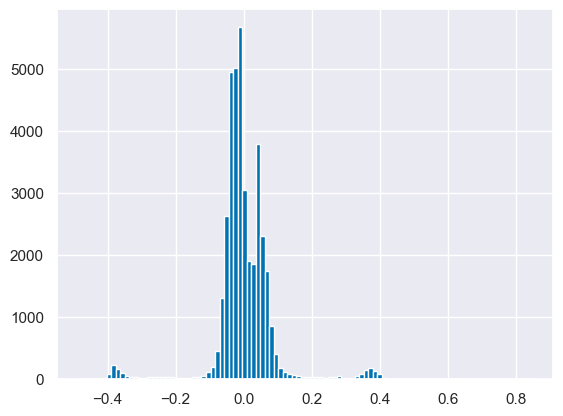

In [207]:
corrs = numdf_3.corr()
corrs.loc[list(set(corrs.index)-set(rel_columns)),rel_columns].stack().hist(bins=100)

In [208]:
useful_rect = corrs.loc[list(set(corrs.index)-set(rel_columns)),rel_columns]
useful_rect[useful_rect>.2].stack().dropna().sort_values().tail(10)

The Economy(voteno:10)_yes                                                                                                         Holy Book(Affirmation)_17         0.404844
European Union (Withdrawal) Bill - Environmental protection after EU exit(voteno:99)_yes                                           Holy Book(Affirmation)_17         0.406111
Universal Credit Roll-Out(voteno:24)_abs(missing)                                                                                  Holy Book(King James Bible)_17    0.406162
European Union (Withdrawal) Bill - Environmental protection: principles under Article 191 of TFEU(voteno:41)_yes                   Holy Book(Affirmation)_17         0.406654
Economy and Jobs(voteno:4)_no                                                                                                      Holy Book(Affirmation)_17         0.407002
European Union (Withdrawal) Bill - Duty to make arrangements for an independent evaluation: health and social care(voteno:84)_yes 

In [209]:
useful_rect['Christian (Evangelical)'].dropna().sort_values()

NaN                                                                                                                                          -0.262712
European Union (Withdrawal) (No. 5) Bill - Duties in connection with Article 50 extension(voteno:407)_no                                     -0.144931
Northern Ireland (Executive Formation) Bill - Progress reports(voteno:438)_yes                                                               -0.141787
Uk&#8217;S Withdrawal from the Eu(voteno:347)_yes                                                                                            -0.133312
Northern Ireland (Executive Formation) Bill - New Clause 1(voteno:427)_yes                                                                   -0.126390
                                                                                                                                                ...   
Northern Ireland (Executive Formation) Bill - New Clause 1(voteno:427)_no                     

In [190]:
useful_rect['Christian (Mormon)'].dropna().sort_values()

NaN                                                                                                                                          -0.116456
Main Estimates 2018-19(voteno:202)_abs(missing)                                                                                              -0.099534
Royal Assent - Independent Complaints and Grievance Policy(voteno:232)_abs(missing)                                                          -0.094626
Adjournment (Summer)(voteno:423)_abs(missing)                                                                                                -0.087084
European Union (Withdrawal) Act - [9th Allotted Day](voteno:293)_no                                                                          -0.086005
                                                                                                                                                ...   
Northern Ireland (Executive Formation and Exercise of Functions) Bill - Equal rights for peopl

In [210]:
col_list = ['Conservative', 'DUP', 'Green', 'Independent', 'Labour',
       'Liberal Democrat', 'Plaid Cymru', 'Scottish National Party',
       'Sinn Fein',]
numdf_3[col_list] = pd.get_dummies( df_filled_in["Winner17"] ).loc[bes_17_ids.dropna().astype(int)][col_list].values

numdf_3["Winner17_female"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_female"].astype('float').values
numdf_3["Winner17_lgbt_out"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_lgbt_out"].astype('float').values
numdf_3["Winner17_bme"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_bme"].astype('float').values
numdf_3["Winner17_milvet"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_milvet"].astype('float').values
numdf_3["Winner17_cann"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_cann"].astype('float').values
numdf_3["Winner17_age"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_age"].astype('float').values
numdf_3["Winner17_children"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_children"].astype('float').values

numdf_3["Winner17_num_tran"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Num Transitions In Term 17"].astype('float').values
numdf_3["Winner17_lost_whip"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "LostWhip 17"].astype('float').values
numdf_3["Winner17_end_indep"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "EndIndep 17"].astype('float').values
numdf_3["Winner17_reinstated"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Reinstated 17"].astype('float').values
numdf_3["Winner17_changed_party"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "ChangeParty 17"].astype('float').values
numdf_3["Winner17_resigned"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "resigned_17"].astype('float').values
# numdf_3["Winner17_children"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_children"].astype('float').values

# numdf_3["Winner17_num_tran"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Seniority15"].astype('float').values
numdf_3["Winner17_seniority"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Seniority17"].astype('float').values
# numdf_3["Winner17_end_indep"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Seniority19"].astype('float').values
# numdf_3["Winner17_reinstated"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "FirstParlTerm15"].astype('float').values
numdf_3["Winner17_first_parl_term"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "FirstParlTerm17"].astype('float').values
# numdf_3["Winner17_resigned"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "FirstParlTerm19"].astype('float').values

# christ_cols = ['Christian', 'Christian (Baptist)', 'Christian (Catholic)',
#        'Christian (Church of England)', 'Christian (Church of Ireland)',
#        'Christian (Church of Scotland)', 'Christian (Evangelical)',
#        'Christian (Free Church of Scotland)',
#        'Christian (Free Presbyterian Church of Ulster)',
#        'Christian (Methodist)', 'Christian (Mormon)',
#        'Christian (Presbyterian Church in Ireland)', 'Christian (Quaker)',
#        'Christian (Scottish Episcopal)']

christ_right_cols = ['Christian', 'Christian (Catholic)',
       'Christian (Church of Ireland)',
       'Christian (Evangelical)',
       'Christian (Free Presbyterian Church of Ulster)',
       'Christian (Mormon)',
       'Christian (Presbyterian Church in Ireland)',
       ]

# christ_right_cols_minus_catholics = ['Christian',
#        'Christian (Church of Ireland)',
#        'Christian (Evangelical)',
#        'Christian (Free Presbyterian Church of Ulster)',
#        'Christian (Mormon)',
#        'Christian (Presbyterian Church in Ireland)',
#        ]

# christ_right_cols_minus_non_denom = ['Christian (Catholic)',
#        'Christian (Church of Ireland)',
#        'Christian (Evangelical)',
#        'Christian (Free Presbyterian Church of Ulster)',
#        'Christian (Mormon)',
#        'Christian (Presbyterian Church in Ireland)',
#        ]

# christ_right_cols_minus_non_denom = [
#        'Christian (Church of Ireland)',
#        'Christian (Evangelical)',
#        'Christian (Free Presbyterian Church of Ulster)',
#        'Christian (Mormon)',
#        'Christian (Presbyterian Church in Ireland)',
#        ]

# numdf_3["Christian(Any)"] = numdf_3[christ_cols].any(axis=1).astype('float')
numdf_3["Christian(Right)"] = numdf_3[christ_right_cols].any(axis=1).astype('float')
# numdf_3["Christian(Right_minus_cath)"] = numdf_3[christ_right_cols_minus_catholics].any(axis=1).astype('float')
# numdf_3["Christian(Right_denom)"] = numdf_3[christ_right_cols_minus_non_denom].any(axis=1).astype('float')
# numdf_3["Christian(Right_denom_minus_cath)"] = numdf_3[christ_right_cols_minus_non_denom].any(axis=1).astype('float')


[0]	validation_0-rmse:0.48419	validation_1-rmse:0.48520
[1]	validation_0-rmse:0.46887	validation_1-rmse:0.47159
[2]	validation_0-rmse:0.45561	validation_1-rmse:0.46046
[3]	validation_0-rmse:0.44290	validation_1-rmse:0.44905
[4]	validation_0-rmse:0.43069	validation_1-rmse:0.43827
[5]	validation_0-rmse:0.41935	validation_1-rmse:0.42825
[6]	validation_0-rmse:0.40857	validation_1-rmse:0.41977
[7]	validation_0-rmse:0.39797	validation_1-rmse:0.41073
[8]	validation_0-rmse:0.38836	validation_1-rmse:0.40300
[9]	validation_0-rmse:0.37903	validation_1-rmse:0.39536
[10]	validation_0-rmse:0.37080	validation_1-rmse:0.38860
[11]	validation_0-rmse:0.36237	validation_1-rmse:0.38189
[12]	validation_0-rmse:0.35425	validation_1-rmse:0.37549
[13]	validation_0-rmse:0.34706	validation_1-rmse:0.37084
[14]	validation_0-rmse:0.34015	validation_1-rmse:0.36587
[15]	validation_0-rmse:0.33350	validation_1-rmse:0.36100
[16]	validation_0-rmse:0.32754	validation_1-rmse:0.35703
[17]	validation_0-rmse:0.32121	validation

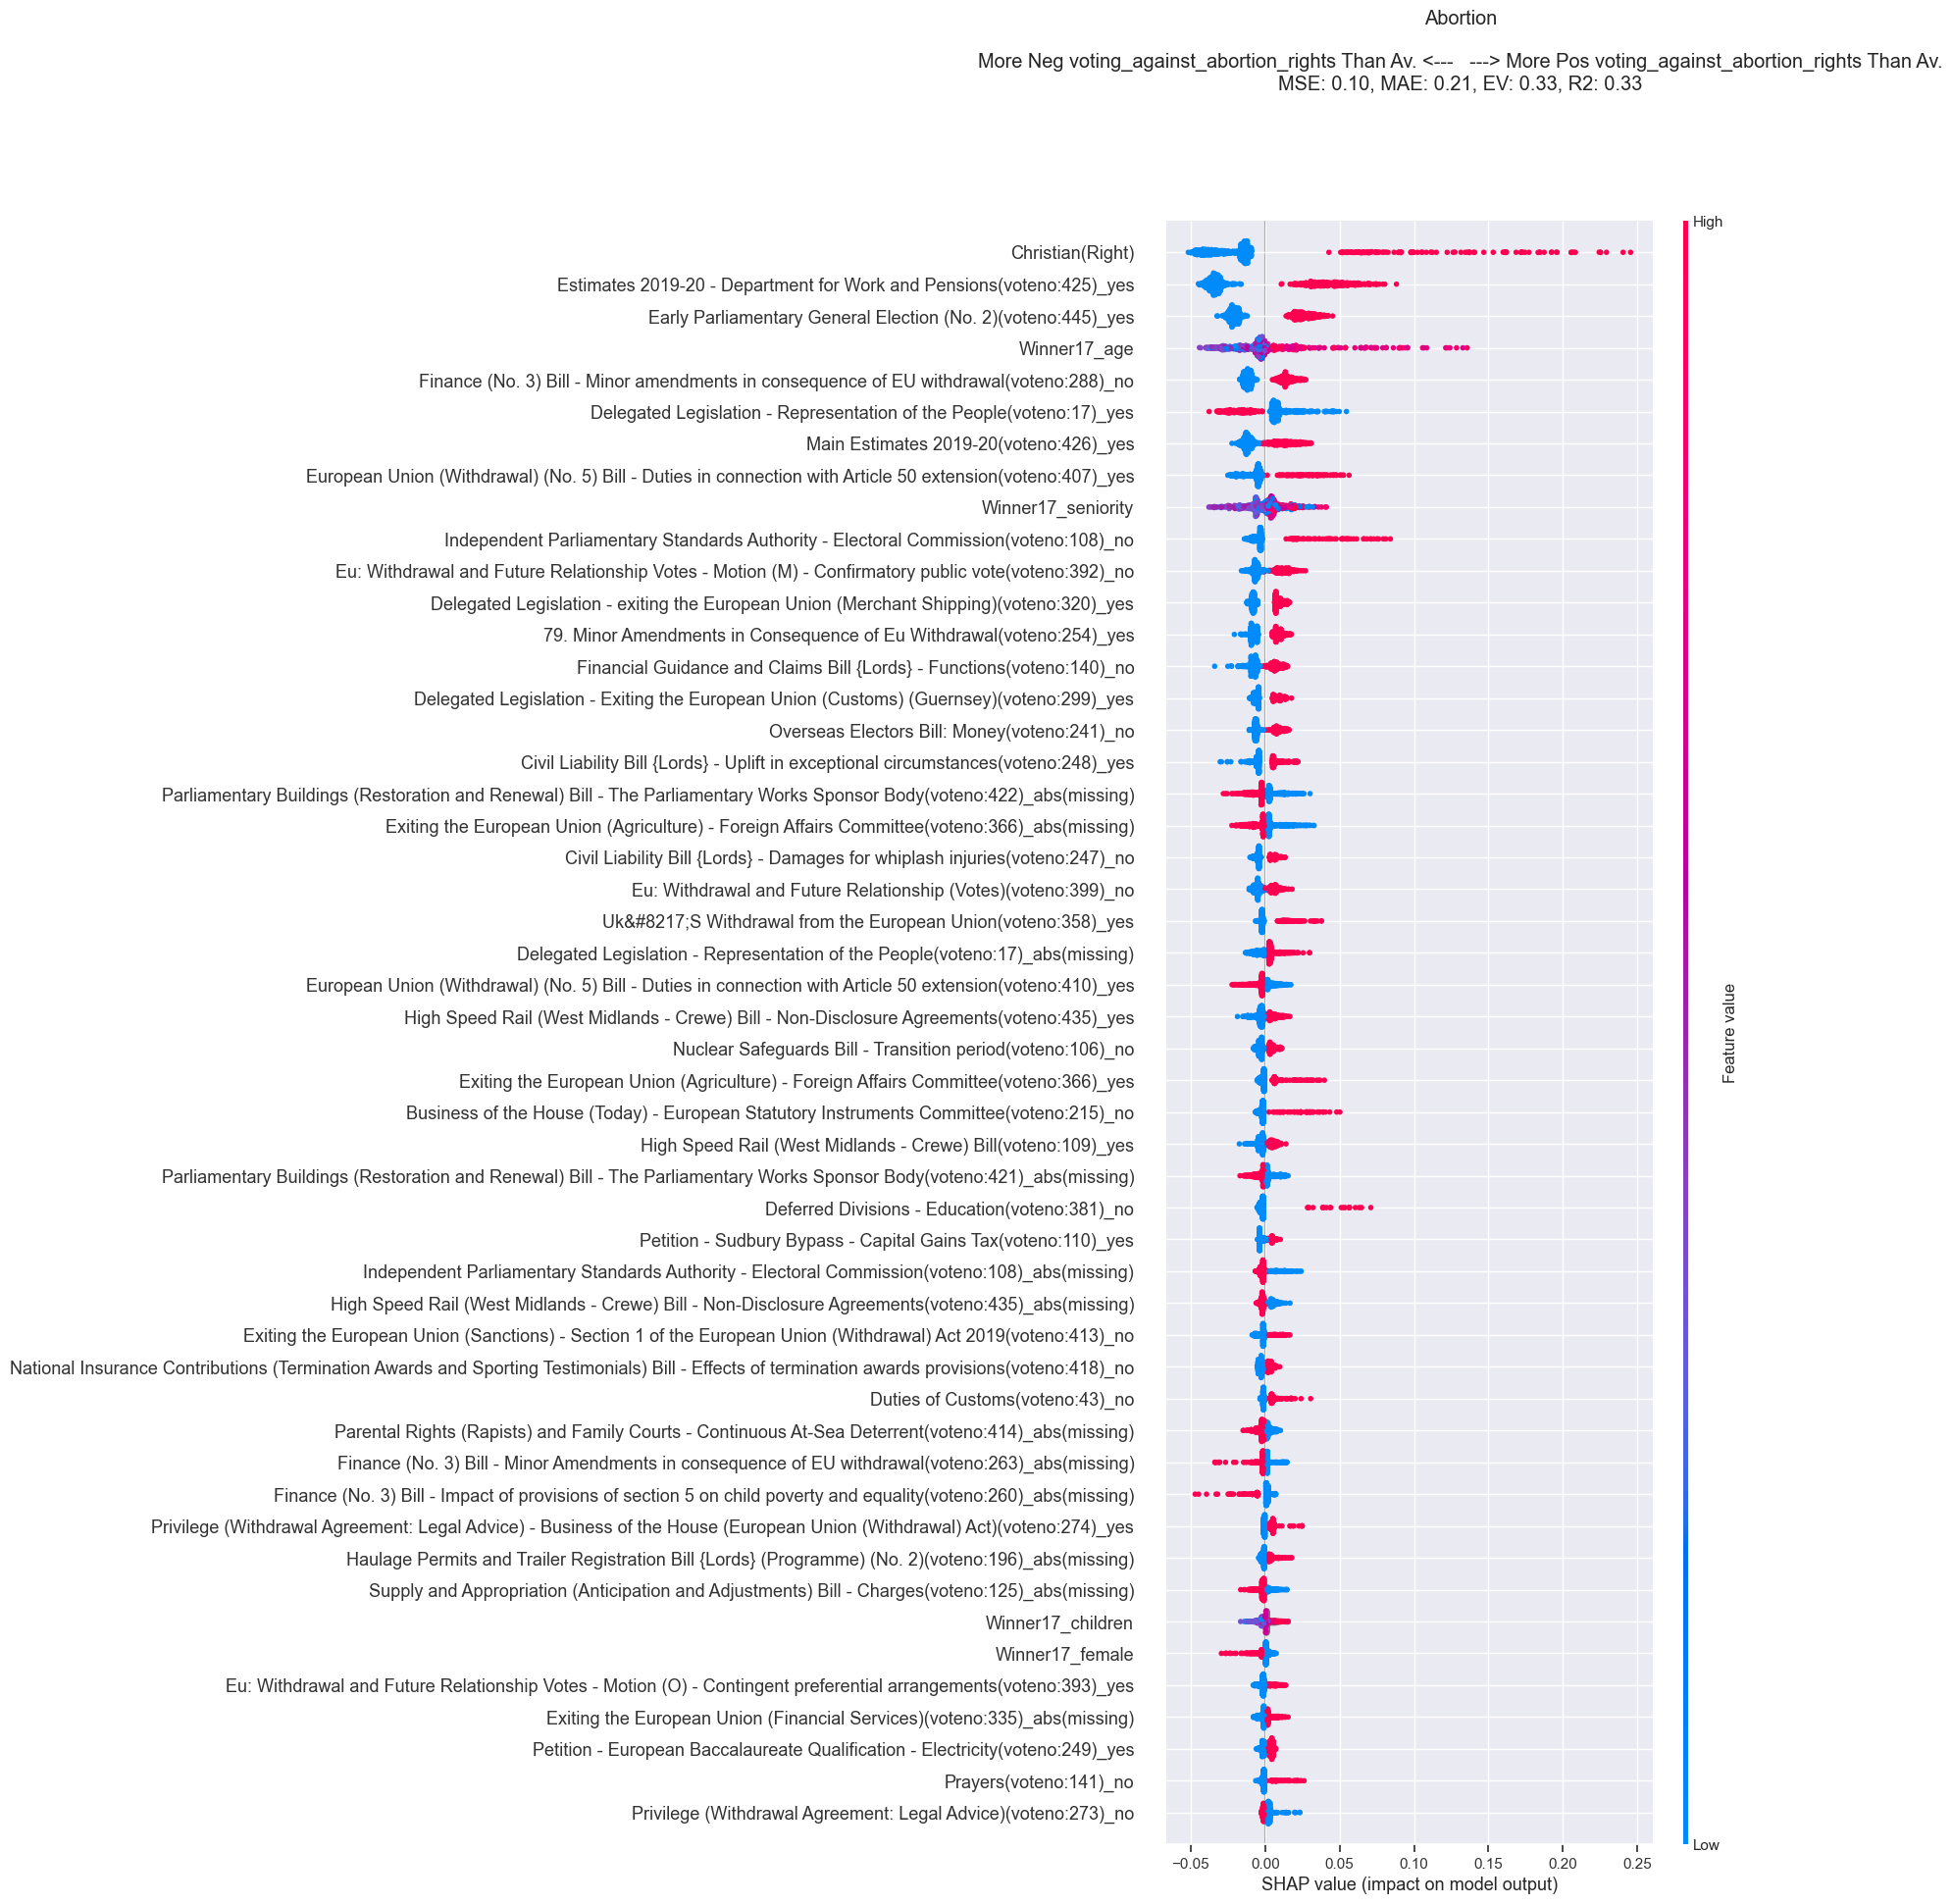

In [215]:
base=  'voting_against_abortion_rights'
Treatment='predict_abortion_vote'
var_stub='Abortion'
var_list = ['Abortion(voteno:244)_no']
var_stub_list = ['Abortion',"Northern Ireland (Executive Formation",
                 "Cannabis (Legalisation and Regulation)(voteno:275)",
                 "Eu: Withdrawal and Future Relationship Votes - Motion (H) - EFTA and EEA(voteno:388)",
                "Uk&#8217;S Withdrawal from the Eu(voteno:347)"]

#  'Eu: Withdrawal and Future Relationship Votes - Motion (H) - EFTA and EEA(voteno:388)_yes',
# looks like the EFTA&EEA 'meaningful vote'

# 'Petition - Sudbury Bypass - Capital Gains Tax(voteno:110)_yes'
# looks like vote on capital gains tax here:
# https://hansard.parliament.uk/Commons/2018-01-31/debates/E46360EF-E41A-4FA6-A703-AE604CF082E1/CapitalGainsTax
# https://votes.parliament.uk/Votes/Commons/Division/377
# straight up Governing Coalition vs Opposition parties?

# 'Courts and Tribunals (Judiciary and Functions of Staff) Bill [Lords] - Authorised court and tribunal staff: legal advice and judicial functions(voteno:280)_no'
# guessing this just another Governing Coalition vs Opposition parties vote (on a bill bounced back from the Lords?)


df=numdf_3.drop(np.nan,axis=1).copy()
df.columns = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in df.columns]
# (explainer, shap_values, train_columns, alg)
(explainer, shap_values, train_columns, train_index, alg, output_subfolder,metrics) = \
    xgboost_run(dataset=df,var_list=var_list,
                var_stub_list = var_stub_list,
                subdir=Treatment,min_features = min(df.shape[1]-1,50),
           title = var_stub+"\n\nMore Neg "+base+" Than Av. <---   ---> More Pos "+base+" Than Av.", Treatment=Treatment)

In [216]:
numdf_3.columns[-50:]

Index(['Adjournment (November and Christmas) - Business of the House (Private Members&#8217; Bills)(voteno:9)_yes',
       'Adjournment (November and Christmas) - Business of the House (Private Members&#8217; Bills)(voteno:8)_abs(missing)',
       'Adjournment (November and Christmas) - Business of the House (Private Members&#8217; Bills)(voteno:8)_no',
       'Adjournment (November and Christmas) - Business of the House (Private Members&#8217; Bills)(voteno:8)_yes',
       'Air Travel Organisers&#8217; Licensing Bill - Potential impact of leaving the EU on consumer protection under the ATOL scheme(voteno:7)_abs(missing)',
       'Air Travel Organisers&#8217; Licensing Bill - Potential impact of leaving the EU on consumer protection under the ATOL scheme(voteno:7)_no',
       'Air Travel Organisers&#8217; Licensing Bill - Potential impact of leaving the EU on consumer protection under the ATOL scheme(voteno:7)_yes',
       'Air Travel Organisers&#8217; Licensing Bill - Air travel organ

[0]	validation_0-rmse:0.48362	validation_1-rmse:0.48387
[1]	validation_0-rmse:0.46661	validation_1-rmse:0.46814
[2]	validation_0-rmse:0.45044	validation_1-rmse:0.45392
[3]	validation_0-rmse:0.43536	validation_1-rmse:0.44088
[4]	validation_0-rmse:0.42025	validation_1-rmse:0.42758
[5]	validation_0-rmse:0.40746	validation_1-rmse:0.41596
[6]	validation_0-rmse:0.39418	validation_1-rmse:0.40501
[7]	validation_0-rmse:0.38278	validation_1-rmse:0.39571
[8]	validation_0-rmse:0.37182	validation_1-rmse:0.38570
[9]	validation_0-rmse:0.36084	validation_1-rmse:0.37699
[10]	validation_0-rmse:0.35576	validation_1-rmse:0.37325
[11]	validation_0-rmse:0.34643	validation_1-rmse:0.36587
[12]	validation_0-rmse:0.33734	validation_1-rmse:0.35895
[13]	validation_0-rmse:0.32877	validation_1-rmse:0.35234
[14]	validation_0-rmse:0.32489	validation_1-rmse:0.34919
[15]	validation_0-rmse:0.31672	validation_1-rmse:0.34329
[16]	validation_0-rmse:0.30953	validation_1-rmse:0.33789
[17]	validation_0-rmse:0.30308	validation

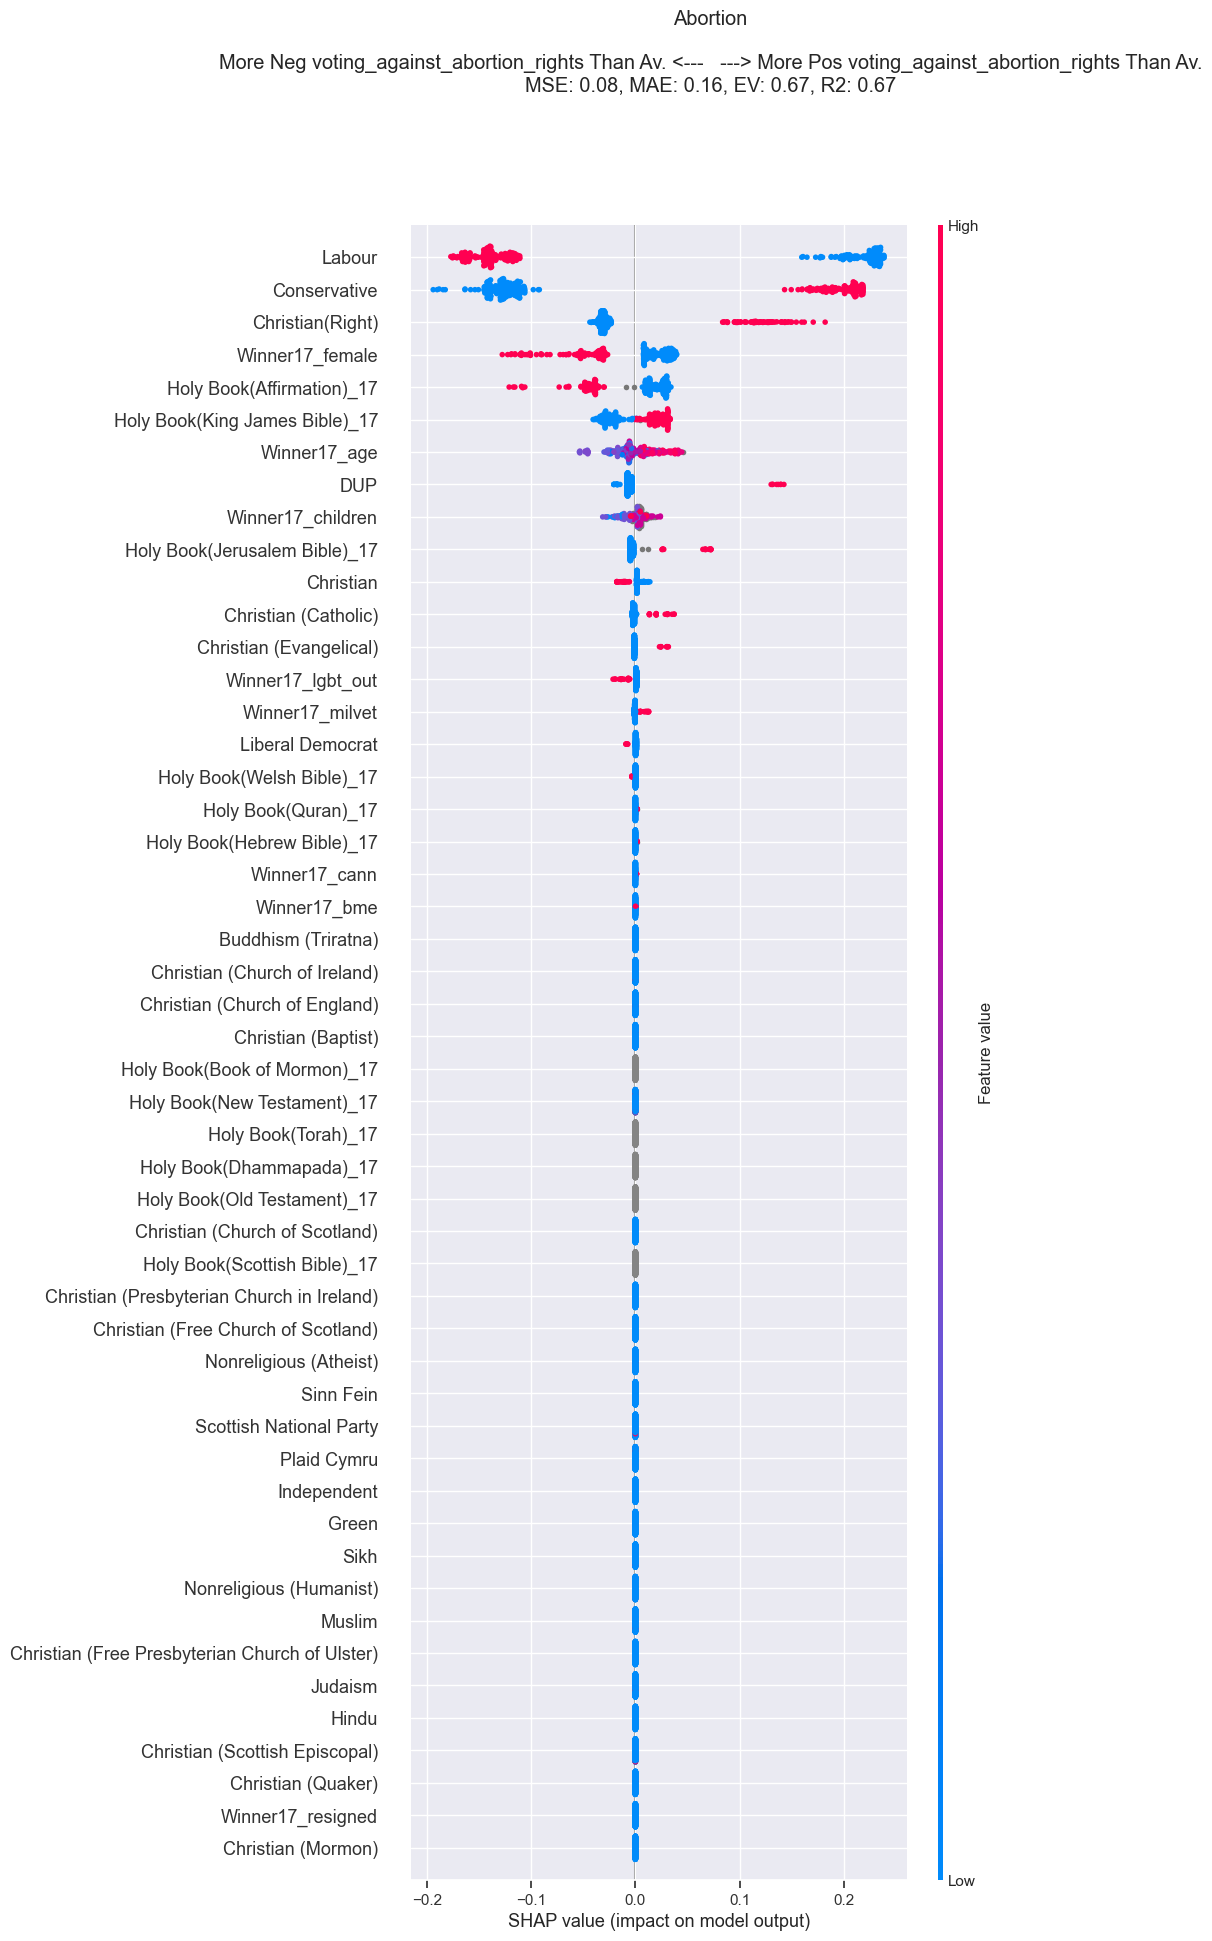

In [240]:
base=  'voting_against_abortion_rights'
Treatment='predict_abortion_vote'
var_stub='Abortion'
var_list = ['Abortion(voteno:244)_no']
var_stub_list = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in matrix_2017["uniqueBillName"].values]
var_stub_list = var_stub_list+['Winner17_seniority', 'Winner17_first_parl_term']
var_stub_list = var_stub_list+['Winner17_num_tran', 'Winner17_lost_whip', 'Winner17_end_indep',
       'Winner17_reinstated', 'Winner17_changed_party']

mask = numdf_3['Abortion(voteno:244)_abs(missing)']==0


df=numdf_3.drop(np.nan,axis=1)[mask].copy()
df.columns = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in df.columns]
# (explainer, shap_values, train_columns, alg)
(explainer, shap_values, train_columns, train_index, alg, output_subfolder,metrics) = \
    xgboost_run(dataset=df,var_list=var_list,
                var_stub_list = var_stub_list,
                subdir=Treatment,min_features = min(df.shape[1]-1,50),
           title = var_stub+"\n\nMore Neg "+base+" Than Av. <---   ---> More Pos "+base+" Than Av.", Treatment=Treatment)

In [239]:
numdf_3['Abortion(voteno:244)_abs(missing)'].shape

(689,)

[0]	validation_0-rmse:0.34014	validation_1-rmse:0.34009
[1]	validation_0-rmse:0.33353	validation_1-rmse:0.33371
[2]	validation_0-rmse:0.32997	validation_1-rmse:0.33068
[3]	validation_0-rmse:0.32446	validation_1-rmse:0.32522
[4]	validation_0-rmse:0.31918	validation_1-rmse:0.32011
[5]	validation_0-rmse:0.31351	validation_1-rmse:0.31469
[6]	validation_0-rmse:0.30818	validation_1-rmse:0.31000
[7]	validation_0-rmse:0.30294	validation_1-rmse:0.30507
[8]	validation_0-rmse:0.29845	validation_1-rmse:0.30189
[9]	validation_0-rmse:0.29466	validation_1-rmse:0.29854
[10]	validation_0-rmse:0.29034	validation_1-rmse:0.29498
[11]	validation_0-rmse:0.28615	validation_1-rmse:0.29122
[12]	validation_0-rmse:0.28452	validation_1-rmse:0.28971
[13]	validation_0-rmse:0.28119	validation_1-rmse:0.28673
[14]	validation_0-rmse:0.27815	validation_1-rmse:0.28419
[15]	validation_0-rmse:0.27521	validation_1-rmse:0.28171
[16]	validation_0-rmse:0.27239	validation_1-rmse:0.27968
[17]	validation_0-rmse:0.26986	validation

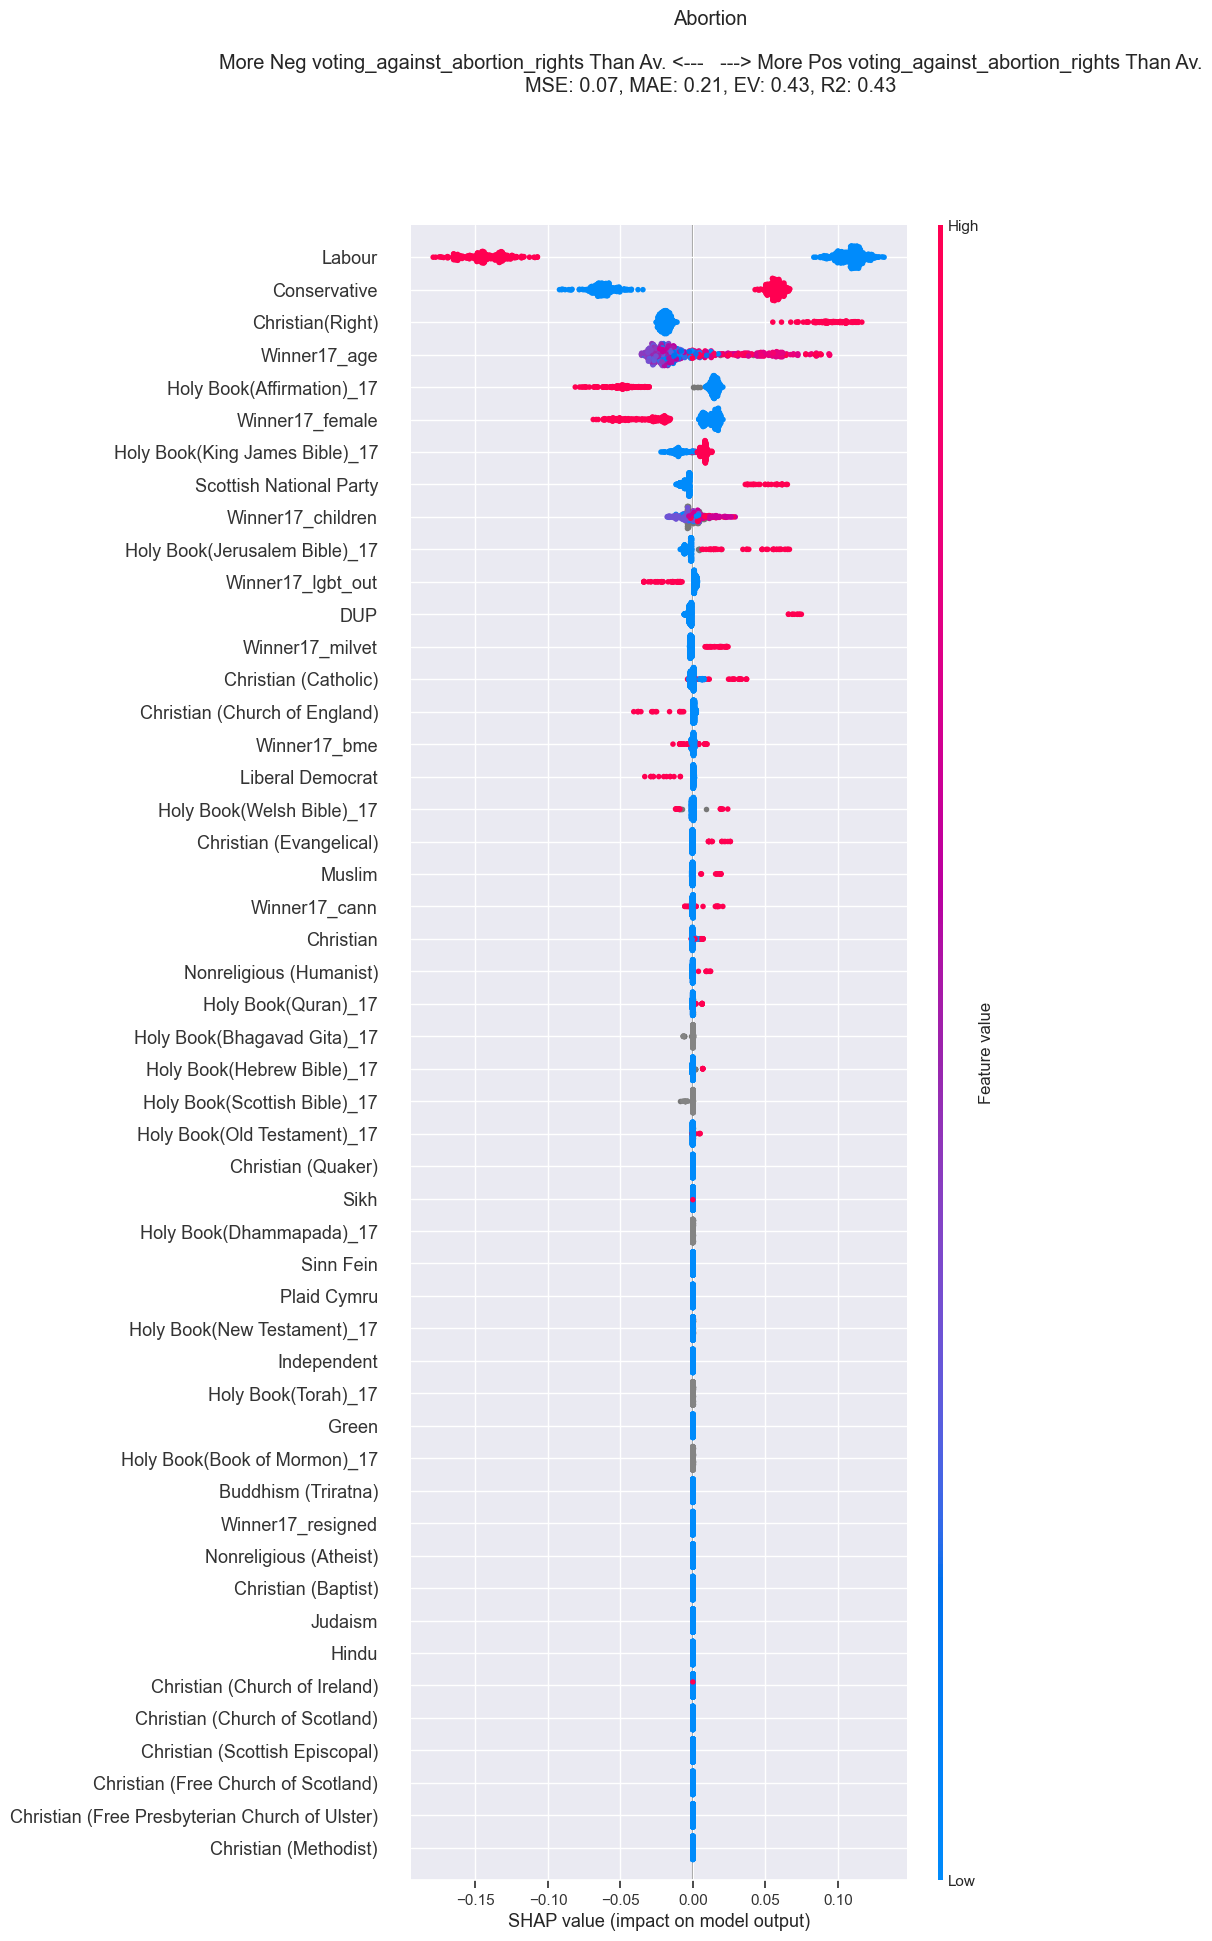

In [243]:
numdf_3['Abortion(voteno:244)_num'] = numdf_3['Abortion(voteno:244)_no'] + (numdf_3['Abortion(voteno:244)_abs(missing)']*.5) + (numdf_3['Abortion(voteno:244)_abs(both)']*.5)

base=  'voting_against_abortion_rights'
Treatment='predict_abortion_vote'
var_stub='Abortion'
var_list = ['Abortion(voteno:244)_num']
var_stub_list = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in matrix_2017["uniqueBillName"].values]
var_stub_list = var_stub_list+['Winner17_seniority', 'Winner17_first_parl_term']
var_stub_list = var_stub_list+['Winner17_num_tran', 'Winner17_lost_whip', 'Winner17_end_indep',
       'Winner17_reinstated', 'Winner17_changed_party']

# mask = numdf_3['Abortion(voteno:244)_abs(missing)']==0


df=numdf_3.drop(np.nan,axis=1).copy()
df.columns = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in df.columns]
# (explainer, shap_values, train_columns, alg)
(explainer, shap_values, train_columns, train_index, alg, output_subfolder,metrics) = \
    xgboost_run(dataset=df,var_list=var_list,
                var_stub_list = var_stub_list,
                subdir=Treatment,min_features = min(df.shape[1]-1,50),
           title = var_stub+"\n\nMore Neg "+base+" Than Av. <---   ---> More Pos "+base+" Than Av.", Treatment=Treatment)

In [ ]:
## actual breakdown
# https://votes.parliament.uk/Votes/Commons/Division/512#noes

In [ ]:
# replace_dict_pw = {"no":"no",
#  "aye":"yes",
#  "missing":"abs(missing)",
#  "tellaye":"yes",
#  "tellno":"no",
#  "both":"abs(both)"}

In [ ]:
# Abortion(voteno:244)
# no:125
# yes:208
# abs(both):1
# abs(missing):355

In [233]:
numdf_3['Abortion(voteno:244)_no'].value_counts(dropna=False)

0    564
1    125
Name: Abortion(voteno:244)_no, dtype: int64

In [234]:
numdf_3['Abortion(voteno:244)_yes'].value_counts(dropna=False)

0    481
1    208
Name: Abortion(voteno:244)_yes, dtype: int64

In [237]:
numdf_3['Abortion(voteno:244)_abs(missing)'].value_counts(dropna=False)

1    355
0    334
Name: Abortion(voteno:244)_abs(missing), dtype: int64

In [238]:
numdf_3['Abortion(voteno:244)_abs(both)'].value_counts(dropna=False)

0    688
1      1
Name: Abortion(voteno:244)_abs(both), dtype: int64

In [220]:
search(df,"first_parl|seniority").index

Index(['Winner17_seniority', 'Winner17_first_parl_term'], dtype='object')

In [ ]:
df["Inf"].value_counts(dropna=False)

In [150]:
df["Oath"].value_counts(dropna=False)

1.0    513
0.0    176
Name: Oath, dtype: int64

In [148]:
df["Inf&Oath"].value_counts(dropna=False)

0.0    550
1.0    139
Name: Inf&Oath, dtype: int64

In [152]:
search(df,"Christian").index

Index(['Christian', 'Christian (Baptist)', 'Christian (Catholic)',
       'Christian (Church of England)', 'Christian (Church of Ireland)',
       'Christian (Church of Scotland)', 'Christian (Evangelical)',
       'Christian (Free Church of Scotland)',
       'Christian (Free Presbyterian Church of Ulster)',
       'Christian (Methodist)', 'Christian (Mormon)',
       'Christian (Presbyterian Church in Ireland)', 'Christian (Quaker)',
       'Christian (Scottish Episcopal)'],
      dtype='object')

In [142]:
df[df["Inf&Oath"]==1.0].sum().head(50)

Holy Book(Bhagavad Gita)_17                                                                                  3.0
Holy Book(Dhammapada)_17                                                                                     0.0
Holy Book(Hebrew Bible)_17                                                                                   2.0
Holy Book(Jerusalem Bible)_17                                                                               21.0
Holy Book(King James Bible)_17                                                                              91.0
Holy Book(New Testament)_17                                                                                  7.0
Holy Book(Old Testament)_17                                                                                  1.0
Holy Book(Quran)_17                                                                                         11.0
Holy Book(Scottish Bible)_17                                                                    

In [ ]:
# "Seniority17",'FirstParlTerm17',
# 'Transitions In Term 17': False -> np.nan

In [76]:
df_filled_in['Transitions In Term 17'].value_counts()

False                                                                        598
Conservative->Independent->Conservative                                       12
Conservative->Independent                                                     11
Labour->Independent                                                            7
Labour->Independent->Labour->Independent                                       2
Labour Co-op->Change UK                                                        2
Labour->Change UK                                                              2
Conservative->Independent->Liberal Democrats                                   2
Labour->Independent->Labour                                                    1
Conservative->Liberal Democrats                                                1
Conservative->Change UK->Independent->The Independents->Liberal Democrats      1
DUP->Independent->DUP                                                          1
Labour->Independent->The Ind

,Num Transitions In Term 17,LostWhip 17,EndIndep 17,Reinstated 17,ChangeParty 17,resigned_17
0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
645,0.0,0.0,0.0,0.0,0.0,0.0
646,0.0,0.0,0.0,0.0,0.0,0.0
647,0.0,0.0,0.0,0.0,0.0,0.0
648,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
df_filled_in.columns[-80:-30]

Index(['public_whip15_mp_ids', 'public_whip17_mp_ids', 'Winner19_milvet',
       'Winner17_milvet', 'Winner15_milvet', 'Winner19_cann', 'Winner17_cann',
       'Winner15_cann', 'Winner19_age', 'Winner19_children', 'Winner17_age',
       'Winner17_children', 'Winner15_age', 'Winner15_children',
       'public_whip19_mp_ids', 'Seniority19', 'FirstParlTerm19', 'Seniority17',
       'FirstParlTerm17', 'Seniority15', 'FirstParlTerm15',
       'Num Transitions In Term 19', 'Transitions In Term 19', 'LostWhip 19',
       'EndIndep 19', 'Reinstated 19', 'ChangeParty 19',
       'Num Transitions In Term 17', 'Transitions In Term 17', 'LostWhip 17',
       'EndIndep 17', 'Reinstated 17', 'ChangeParty 17',
       'Num Transitions In Term 15', 'Transitions In Term 15', 'LostWhip 15',
       'EndIndep 15', 'Reinstated 15', 'ChangeParty 15', 'resigned_15',
       'resigned_17', 'resigned_19', 'Transitions In Term 19 Notes',
       'resigned_15_notes', 'resigned_17_notes', 'resigned_19_notes',
      

In [298]:
matrix_2017["uniqueBillName"] = matrix_2017["Bill"]+"(voteno:"+matrix_2017["voteno"].astype('str')+")"
replace_dict_pw = {"no":0,
 "yes":1,
 "abs(missing)":.5,
 "abs(both)":.5}

matrix_2017_num = matrix_2017.replace(replace_dict_pw)
matrix_2017_num[search(matrix_2017_num,"mpid").index] = matrix_2017_num[search(matrix_2017_num,"mpid").index].astype('float')


## prep dataset for xgboost

temp = matrix_2017_num.T.drop(['Unnamed: 0', 'rowid', 'date', 'voteno', 'Bill','Unnamed: 697'])
temp.columns = temp.loc['uniqueBillName']
temp.drop('uniqueBillName',inplace=True)
temp.index = [int(x.split("mpid")[1]) for x in temp.index]
# temp =pd.get_dummies(temp)

col_list = ['Holy Book(Bhagavad Gita)', 'Holy Book(Dhammapada)',
       'Holy Book(Hebrew Bible)', 'Holy Book(Jerusalem Bible)',
       'Holy Book(King James Bible)', 'Holy Book(New Testament)',
       'Holy Book(Old Testament)', 'Holy Book(Quran)',
       'Holy Book(Scottish Bible)', 'Holy Book(Torah)',
       'Holy Book(Welsh Bible)', 'Holy Book(Book of Mormon)',
       'Holy Book(Affirmation)',]
col_list = [x+"_17" for x in col_list]

temp = temp[bes_17_ids.notnull().values]#
temp = temp.astype('float')

numdf_1 = df_filled_in.loc[bes_17_ids.dropna().astype(int)][col_list].astype('float')
numdf_1.index = temp.index
numdf_2 = pd.get_dummies(df_filled_in["Winner17_religion"].loc[bes_17_ids.dropna().astype(int)],dummy_na=True)
numdf_2.index = temp.index
numdf_3 = pd.concat([numdf_1,numdf_2,temp],axis=1)

rel_columns = list(numdf_3.columns[0:29])

In [299]:
col_list = ['Conservative', 'DUP', 'Green', 'Independent', 'Labour',
       'Liberal Democrat', 'Plaid Cymru', 'Scottish National Party',
       'Sinn Fein',]
numdf_3[col_list] = pd.get_dummies( df_filled_in["Winner17"] ).loc[bes_17_ids.dropna().astype(int)][col_list].values

numdf_3["Winner17_female"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_female"].astype('float').values
numdf_3["Winner17_lgbt_out"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_lgbt_out"].astype('float').values
numdf_3["Winner17_bme"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_bme"].astype('float').values
numdf_3["Winner17_milvet"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_milvet"].astype('float').values
numdf_3["Winner17_cann"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_cann"].astype('float').values
numdf_3["Winner17_age"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_age"].astype('float').values
numdf_3["Winner17_children"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Winner17_children"].astype('float').values

numdf_3["Winner17_num_tran"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Num Transitions In Term 17"].astype('float').values
numdf_3["Winner17_lost_whip"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "LostWhip 17"].astype('float').values
numdf_3["Winner17_end_indep"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "EndIndep 17"].astype('float').values
numdf_3["Winner17_reinstated"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Reinstated 17"].astype('float').values
numdf_3["Winner17_changed_party"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "ChangeParty 17"].astype('float').values
numdf_3["Winner17_resigned"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "resigned_17"].astype('float').values

numdf_3["Winner17_seniority"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "Seniority17"].astype('float').values

numdf_3["Winner17_first_parl_term"] = df_filled_in.loc[bes_17_ids.dropna().astype(int), "FirstParlTerm17"].astype('float').values


christ_right_cols = ['Christian', 'Christian (Catholic)',
       'Christian (Church of Ireland)',
       'Christian (Evangelical)',
       'Christian (Free Presbyterian Church of Ulster)',
       'Christian (Mormon)',
       'Christian (Presbyterian Church in Ireland)',
       ]

numdf_3["Christian(Right)"] = numdf_3[christ_right_cols].any(axis=1).astype('float')


In [307]:
numdf_3

,Holy Book(Bhagavad Gita)_17,Holy Book(Dhammapada)_17,Holy Book(Hebrew Bible)_17,Holy Book(Jerusalem Bible)_17,Holy Book(King James Bible)_17,Holy Book(New Testament)_17,Holy Book(Old Testament)_17,Holy Book(Quran)_17,Holy Book(Scottish Bible)_17,Holy Book(Torah)_17,...,Winner17_children,Winner17_num_tran,Winner17_lost_whip,Winner17_end_indep,Winner17_reinstated,Winner17_changed_party,Winner17_resigned,Winner17_seniority,Winner17_first_parl_term,Christian(Right)
41371,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,301.0,55.0,1.0
41372,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,307.0,55.0,0.0
41373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,265.0,55.0,0.0
41374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,10.0,49.0,0.0
41375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,347.0,55.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42072,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,0.0,1.0,0.0,0.0,327.0,55.0,1.0
42073,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,2.0,1.0,0.0,1.0,0.0,0.0,251.0,55.0,0.0
42074,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,0.0,0.0,0.0,224.0,55.0,0.0
42075,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,0.0,1.0,1.0,0.0,415.0,56.0,0.0


In [323]:
[x for x in numdf_3.drop(np.nan,axis=1).columns if "Cannabis" in x]

['Cannabis (Legalisation and Regulation)(voteno:275)']

In [327]:
numdf_3['AbortionRightsGeneral'] = numdf_3['Abortion(voteno:244)']+\
    numdf_3['Northern Ireland (Executive Formation and Exercise of Functions) Bill - Equal rights for people of Northern Ireland (No. 2)(voteno:250)']+\
    numdf_3['Northern Ireland (Executive Formation and Exercise of Functions) Bill - Equal rights for people of Northern Ireland (No. 2)(voteno:251)']+\
    numdf_3['Northern Ireland (Executive Formation) Bill - International obligations(voteno:428)']+\
    numdf_3['Northern Ireland (Executive Formation) Bill - Progress reports(voteno:438)']+\
    numdf_3['Northern Ireland (Executive Formation) Bill - New Clause 1(voteno:427)']
#     numdf_3['Cannabis (Legalisation and Regulation)(voteno:275)']

[0]	validation_0-rmse:3.62619	validation_1-rmse:3.61795
[1]	validation_0-rmse:3.46242	validation_1-rmse:3.45840
[2]	validation_0-rmse:3.30714	validation_1-rmse:3.30305
[3]	validation_0-rmse:3.16188	validation_1-rmse:3.15654
[4]	validation_0-rmse:3.02079	validation_1-rmse:3.01908
[5]	validation_0-rmse:2.89106	validation_1-rmse:2.89029
[6]	validation_0-rmse:2.76774	validation_1-rmse:2.76825
[7]	validation_0-rmse:2.64887	validation_1-rmse:2.65121
[8]	validation_0-rmse:2.53717	validation_1-rmse:2.54008
[9]	validation_0-rmse:2.43084	validation_1-rmse:2.43474
[10]	validation_0-rmse:2.32977	validation_1-rmse:2.33664
[11]	validation_0-rmse:2.23620	validation_1-rmse:2.24084
[12]	validation_0-rmse:2.14556	validation_1-rmse:2.15473
[13]	validation_0-rmse:2.06043	validation_1-rmse:2.07272
[14]	validation_0-rmse:1.98052	validation_1-rmse:1.99467
[15]	validation_0-rmse:1.90540	validation_1-rmse:1.92506
[16]	validation_0-rmse:1.83306	validation_1-rmse:1.85546
[17]	validation_0-rmse:1.76547	validation

[144]	validation_0-rmse:0.40005	validation_1-rmse:0.91674
[145]	validation_0-rmse:0.39792	validation_1-rmse:0.91682
[146]	validation_0-rmse:0.39499	validation_1-rmse:0.91668
[147]	validation_0-rmse:0.39330	validation_1-rmse:0.91679
[148]	validation_0-rmse:0.39100	validation_1-rmse:0.91685
[149]	validation_0-rmse:0.38972	validation_1-rmse:0.91680
[150]	validation_0-rmse:0.38707	validation_1-rmse:0.91675
[151]	validation_0-rmse:0.38508	validation_1-rmse:0.91675
[152]	validation_0-rmse:0.38314	validation_1-rmse:0.91638
[153]	validation_0-rmse:0.38196	validation_1-rmse:0.91618
[154]	validation_0-rmse:0.37922	validation_1-rmse:0.91634
[155]	validation_0-rmse:0.37771	validation_1-rmse:0.91604
MSE: 0.83, MAE: 0.70, EV: 0.68, R2: 0.67


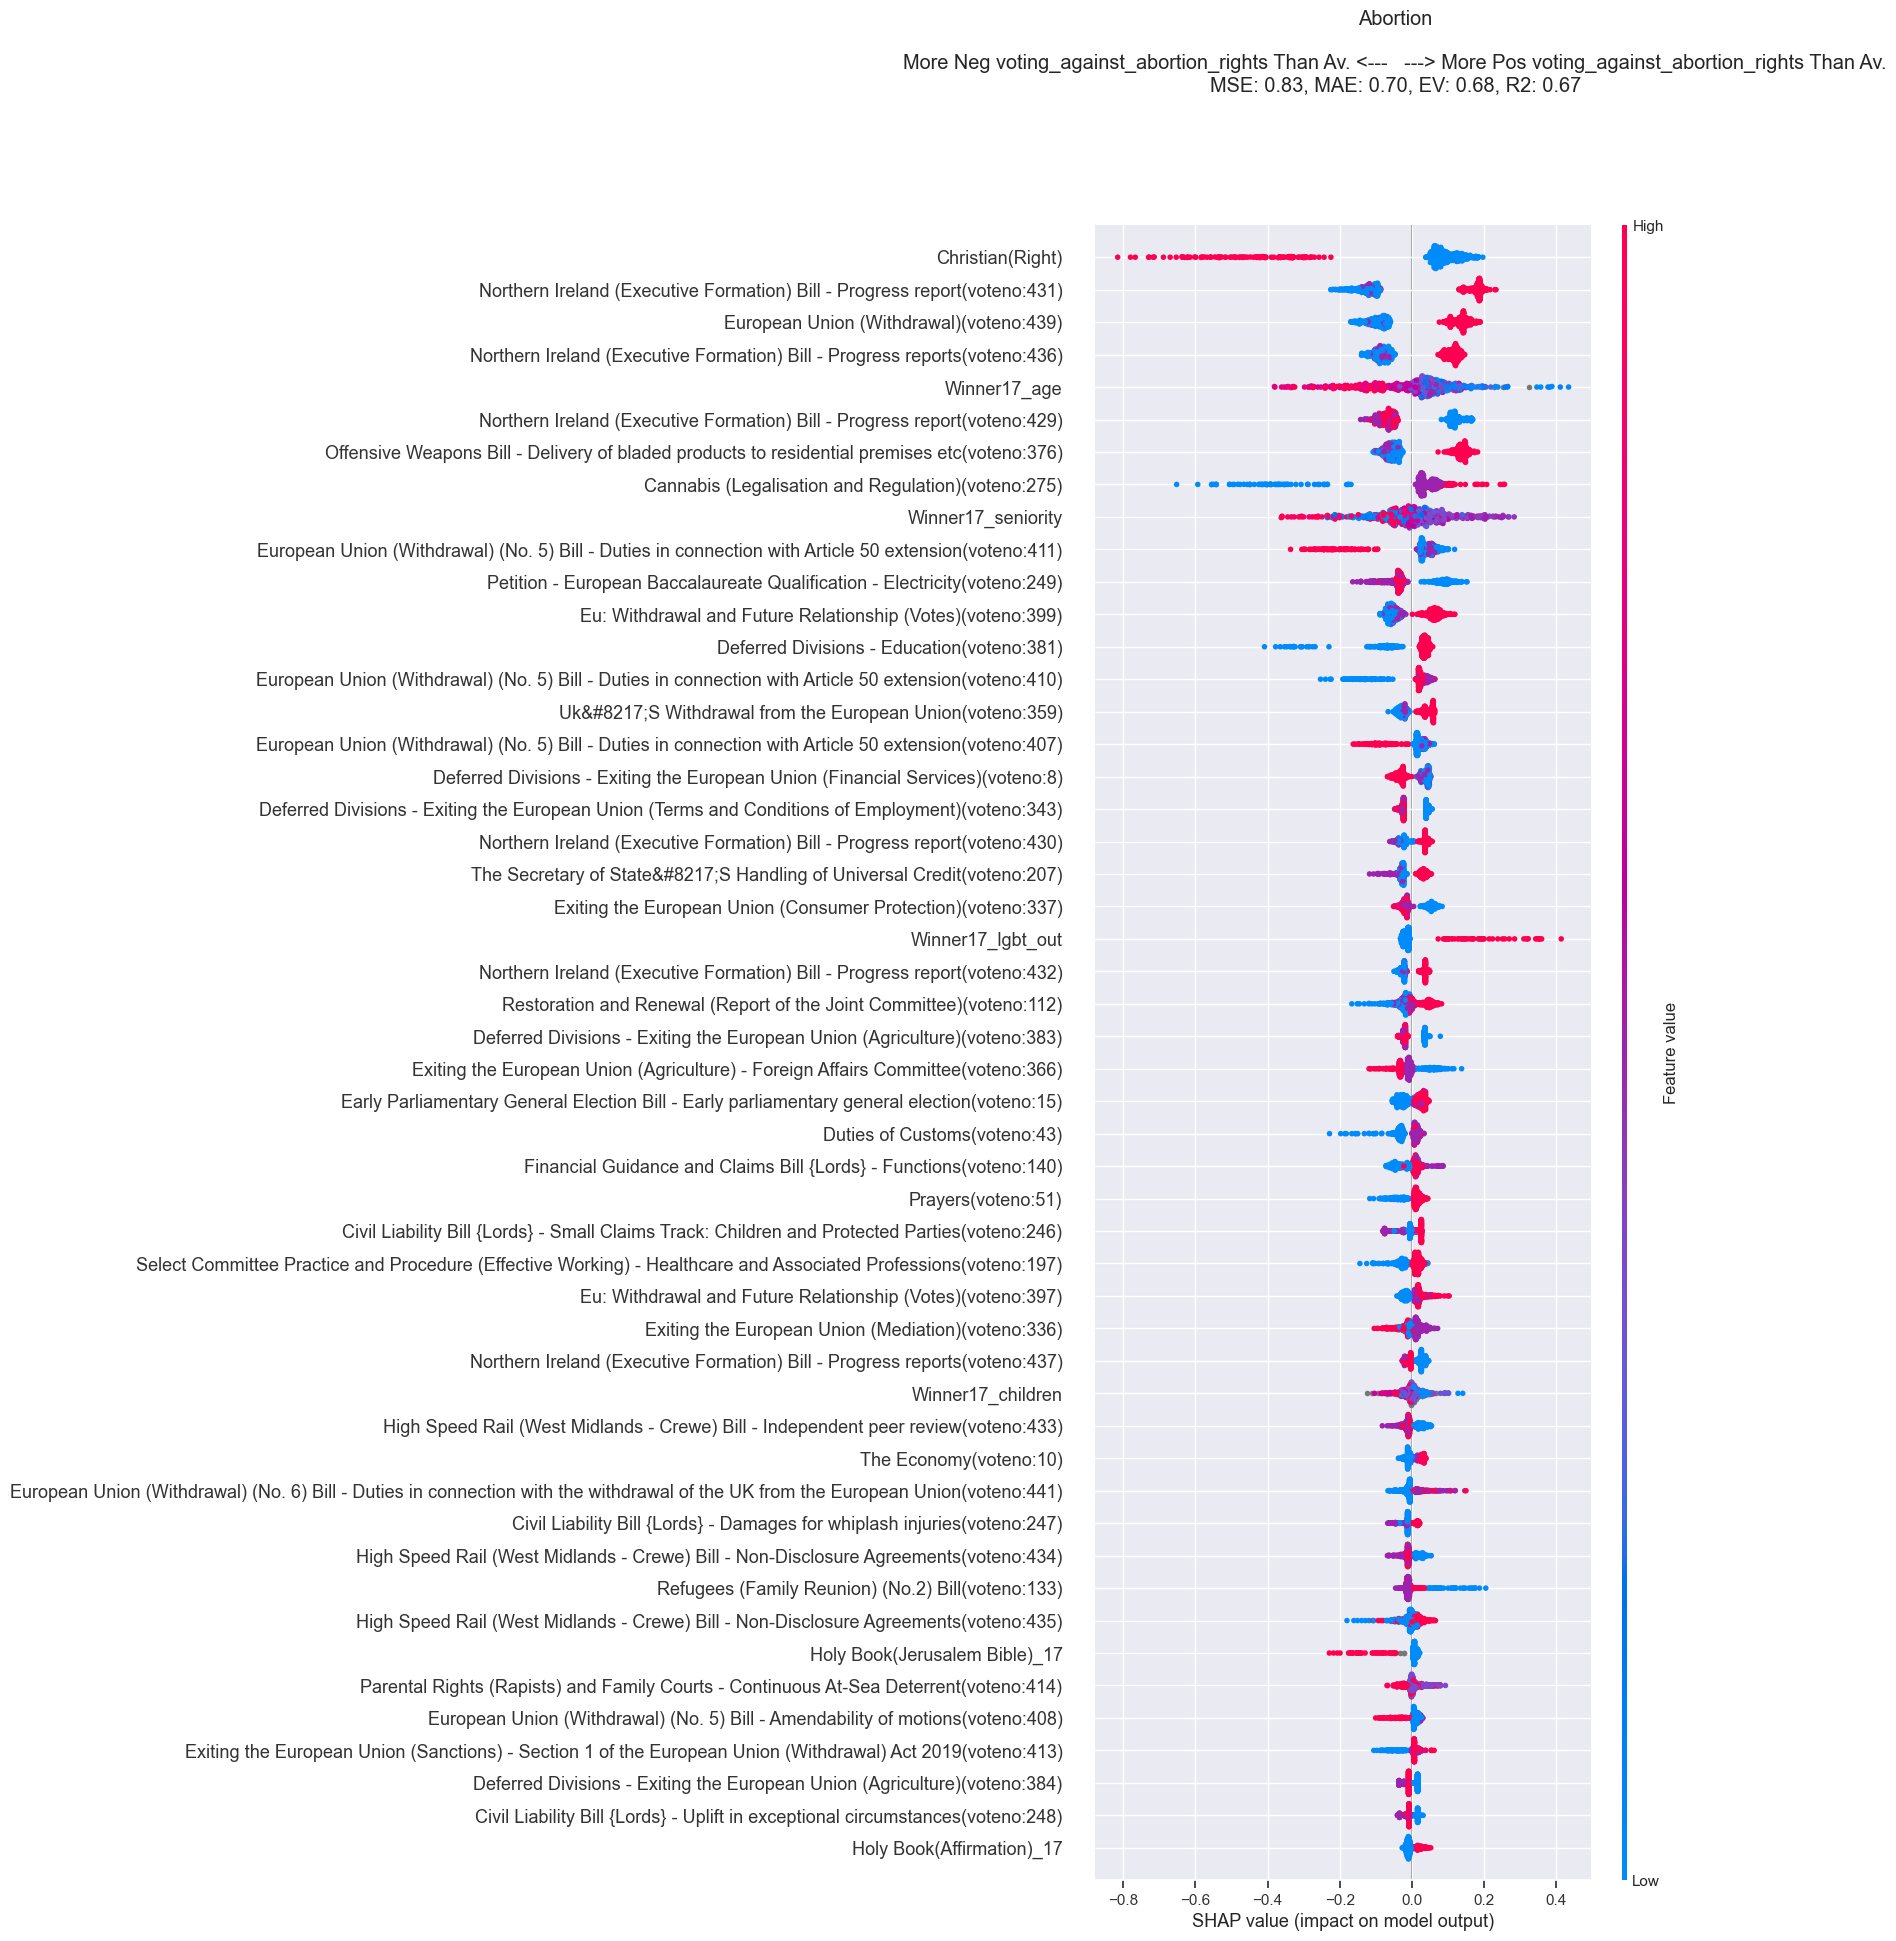

In [328]:
base=  'voting_against_abortion_rights'
Treatment='predict_abortion_vote'
var_stub='Abortion'
var_list = ['AbortionRightsGeneral']

var_stub_list = ['Abortion(voteno:244)',
                'Northern Ireland (Executive Formation and Exercise of Functions) Bill - Equal rights for people of Northern Ireland (No. 2)(voteno:250)',
                'Northern Ireland (Executive Formation and Exercise of Functions) Bill - Equal rights for people of Northern Ireland (No. 2)(voteno:251)',
                'Northern Ireland (Executive Formation) Bill - International obligations(voteno:428)',
                'Northern Ireland (Executive Formation) Bill - Progress reports(voteno:438)',
                'Northern Ireland (Executive Formation) Bill - New Clause 1(voteno:427)',
#                 'Cannabis (Legalisation and Regulation)(voteno:275)',
                
                ]
#     'Abortion',"Northern Ireland (Executive Formation",
#                  "Cannabis (Legalisation and Regulation)(voteno:275)",
#                  "Eu: Withdrawal and Future Relationship Votes - Motion (H) - EFTA and EEA(voteno:388)",
#                 "Uk&#8217;S Withdrawal from the Eu(voteno:347)"]

#  'Eu: Withdrawal and Future Relationship Votes - Motion (H) - EFTA and EEA(voteno:388)_yes',
# looks like the EFTA&EEA 'meaningful vote'

# 'Petition - Sudbury Bypass - Capital Gains Tax(voteno:110)_yes'
# looks like vote on capital gains tax here:
# https://hansard.parliament.uk/Commons/2018-01-31/debates/E46360EF-E41A-4FA6-A703-AE604CF082E1/CapitalGainsTax
# https://votes.parliament.uk/Votes/Commons/Division/377
# straight up Governing Coalition vs Opposition parties?

# 'Courts and Tribunals (Judiciary and Functions of Staff) Bill [Lords] - Authorised court and tribunal staff: legal advice and judicial functions(voteno:280)_no'
# guessing this just another Governing Coalition vs Opposition parties vote (on a bill bounced back from the Lords?)


df=numdf_3.drop(np.nan,axis=1).copy()
df.columns = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in df.columns]
# (explainer, shap_values, train_columns, alg)
(explainer, shap_values, train_columns, train_index, alg, output_subfolder,metrics) = \
    xgboost_run(dataset=df,var_list=var_list,
                var_stub_list = var_stub_list,
                subdir=Treatment,min_features = min(df.shape[1]-1,50),
           title = var_stub+"\n\nMore Neg "+base+" Than Av. <---   ---> More Pos "+base+" Than Av.", Treatment=Treatment)

[0]	validation_0-rmse:3.63298	validation_1-rmse:3.62396
[1]	validation_0-rmse:3.47559	validation_1-rmse:3.46867
[2]	validation_0-rmse:3.33141	validation_1-rmse:3.32496
[3]	validation_0-rmse:3.19379	validation_1-rmse:3.18548
[4]	validation_0-rmse:3.05964	validation_1-rmse:3.05446
[5]	validation_0-rmse:2.93339	validation_1-rmse:2.92831
[6]	validation_0-rmse:2.81471	validation_1-rmse:2.81430
[7]	validation_0-rmse:2.70112	validation_1-rmse:2.70256
[8]	validation_0-rmse:2.59538	validation_1-rmse:2.59873
[9]	validation_0-rmse:2.49657	validation_1-rmse:2.50145
[10]	validation_0-rmse:2.40279	validation_1-rmse:2.40700
[11]	validation_0-rmse:2.31384	validation_1-rmse:2.32213
[12]	validation_0-rmse:2.23405	validation_1-rmse:2.24183
[13]	validation_0-rmse:2.15362	validation_1-rmse:2.16410
[14]	validation_0-rmse:2.08144	validation_1-rmse:2.09350
[15]	validation_0-rmse:2.01325	validation_1-rmse:2.02946
[16]	validation_0-rmse:1.94645	validation_1-rmse:1.96759
[17]	validation_0-rmse:1.88751	validation

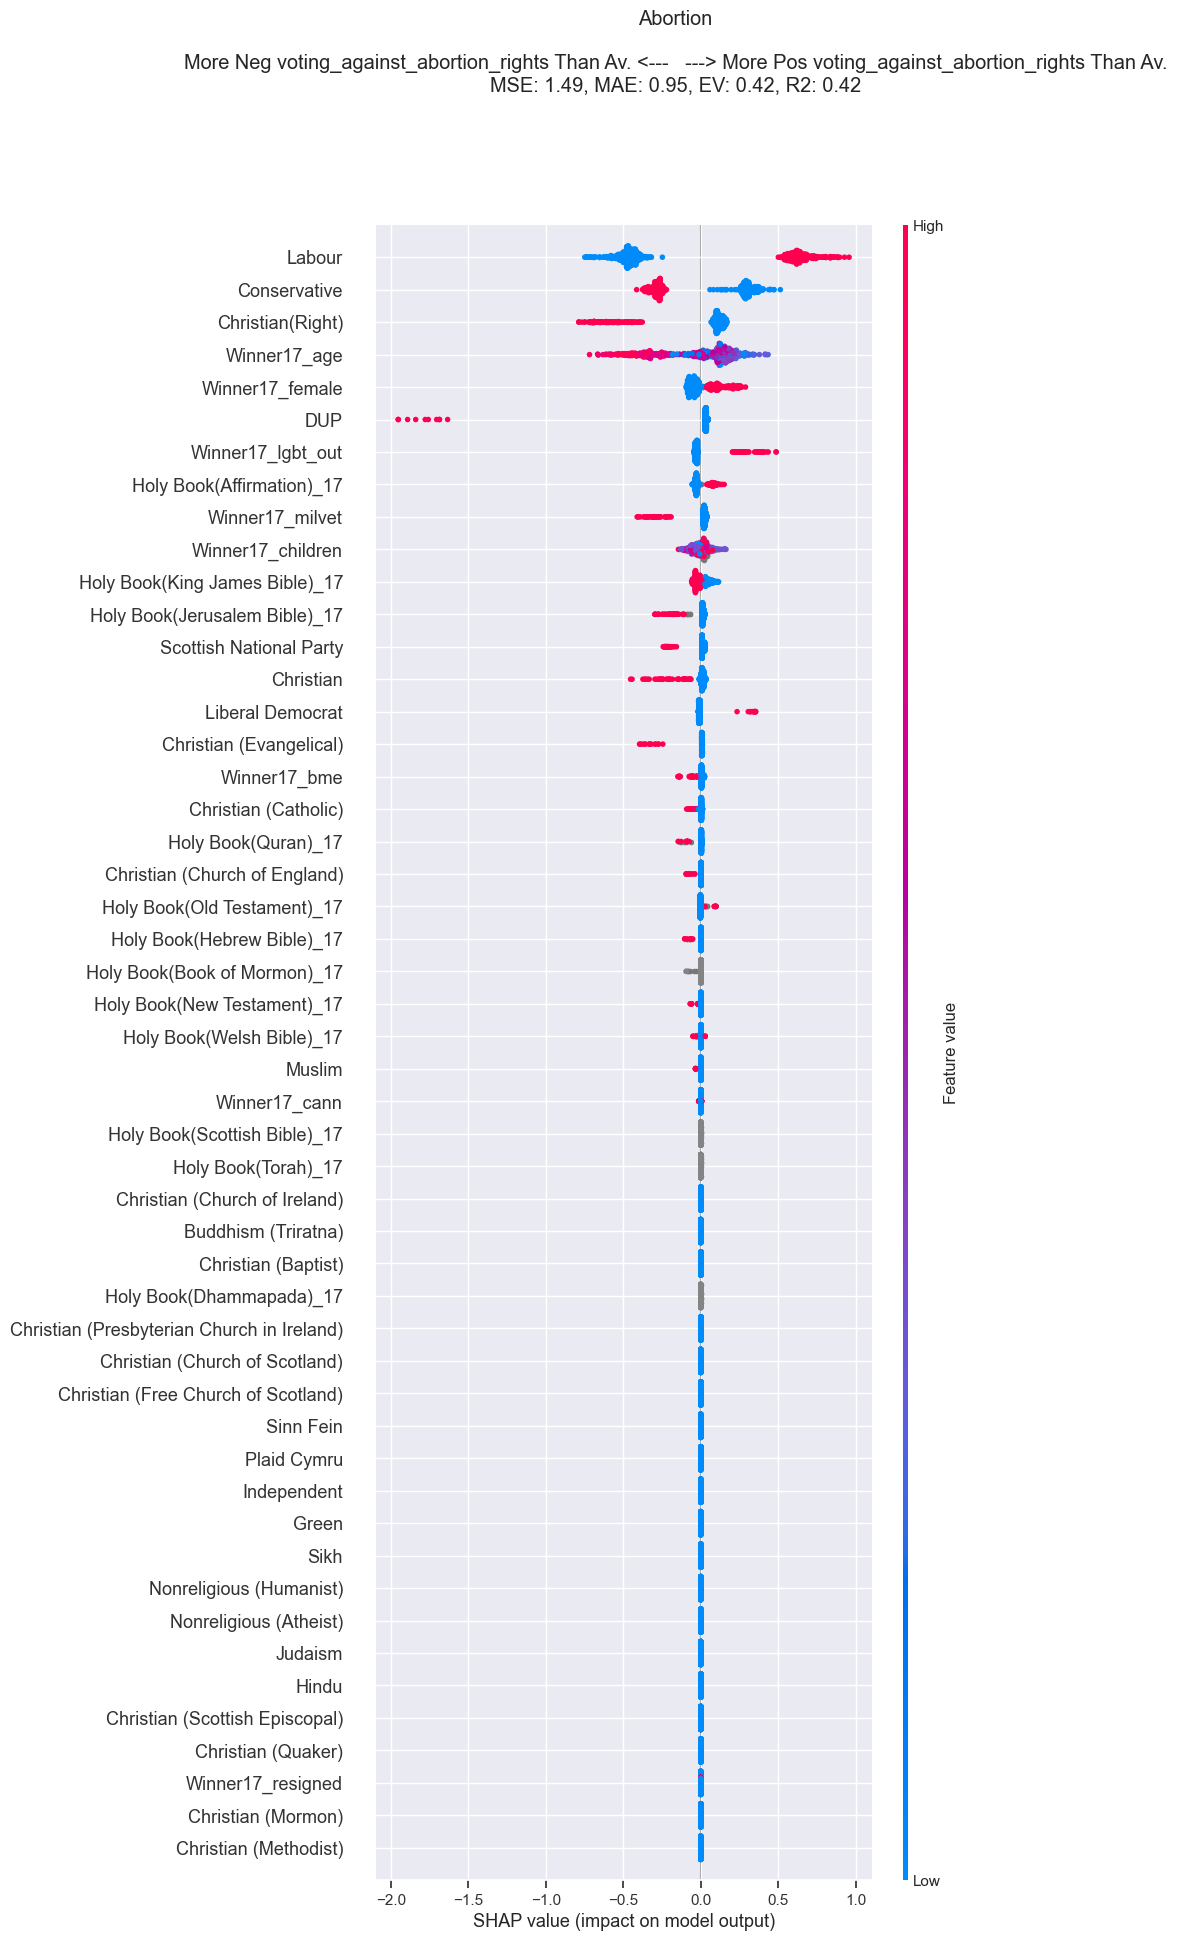

In [329]:
base=  'voting_against_abortion_rights'
Treatment='predict_abortion_vote'
var_stub='Abortion'
var_list = ['AbortionRightsGeneral']
var_stub_list = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in matrix_2017["uniqueBillName"].values]
var_stub_list = var_stub_list+['Winner17_seniority', 'Winner17_first_parl_term']
var_stub_list = var_stub_list+['Winner17_num_tran', 'Winner17_lost_whip', 'Winner17_end_indep',
       'Winner17_reinstated', 'Winner17_changed_party']

# mask = numdf_3['Abortion(voteno:244)_abs(missing)']==0


df=numdf_3.drop(np.nan,axis=1).copy()
df.columns = [x.replace("[","{").replace("]","}").replace("<","{").replace(">","}") for x in df.columns]
# (explainer, shap_values, train_columns, alg)
(explainer, shap_values, train_columns, train_index, alg, output_subfolder,metrics) = \
    xgboost_run(dataset=df,var_list=var_list,
                var_stub_list = var_stub_list,
                subdir=Treatment,min_features = min(df.shape[1]-1,50),
           title = var_stub+"\n\nMore Neg "+base+" Than Av. <---   ---> More Pos "+base+" Than Av.", Treatment=Treatment)